Proyecto Final: Machine Learning para Clasificar la variedad de los Vinos de la empresa JP 🍇🍷
Desarrollado por: Julio Paredes

En este proyecto, realizaremos un análisis exploratorio de datos sobre el conjunto de datos de vinos. 
El objetivo es comprender mejor las características que influyen en la calidad del vino y explorar posibles patrones 
y relaciones entre estas características. El conjunto de datos contiene información sobre diversas propiedades 
físico-químicas de vinos, así como su calidad percibida. Utilizaremos técnicas de visualización y 
resúmenes estadísticos para analizar los datos y responder preguntas clave que permitan clasificar 
los vinos eficientemente mediante un modelo ML.

Preguntas e Hipótesis de Interés (partimos por lo menos con tres preguntas)
¿Existe alguna relación entre las propiedades físico-químicas de los vinos y su calidad percibida?
¿Qué características tienen mayor impacto en la calidad del vino?
¿Cómo varían las propiedades del vino en función de su calidad?
¿Se podrá aplicar algún algoritmo ML que permita conocer la calidad de los vinos y ver a que clase pertenece?
El objetivo de este código es realizar un ejercicio de clasificación utilizando un modelo de regresión logística en 
un conjunto de datos de vinos.

Análisis Exploratorio de Datos
Realizaremos un análisis exploratorio de datos utilizando gráficos interactivos y resúmenes numéricos para responder 
nuestras preguntas de interés y explorar insights preliminares sobre el conjunto de datos de vinos.

Verificación de Valores Nulos
Primero, verificaremos si hay valores nulos en el conjunto de datos y manejaremos los valores faltantes si es necesario.

Visualizaciones Interactivas
Utilizaremos gráficos interactivos para explorar las relaciones entre las características del vino y su calidad percibida. 
Esto nos permitirá visualizar patrones y tendencias de manera más dinámica.

In [5]:
## LIBRERÍAS ##
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pex
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
## Carga del Dataset

df = pd.read_csv('wine.csv')
df.head()       # quick view

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
## Preprocesamiento

df.shape     # filas * columnas

(6497, 13)

In [8]:
## Preprocesamiento

df.info()   # tipo de dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
## Preprocesamiento

df.isna()   #Devuelve el dataset en FALSE/TRUE, siendo TRUE los valores nulos (gemelo de df.isnull())

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
## Preprocesamiento

(df.isna().sum() / df.shape[0]) * 100  # Percentage of missing values per column

# df.isna() - Returns a DataFrame of the same shape as df with True for missing values.
# .sum() - Counts True values (missing values) for each column.
# df.shape[0] - Retrieves the number of rows in the DataFrame (the first element of the tuple df.shape). = 6497


Type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [11]:
## Preprocesamiento

# Para esta parte quiero cambiar el nombre de las columnas a español 
# primero tengo que crear la lista de nombres que van a ser mis nombres de columna"
column_names = ['tipo', 'acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual', 'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total', 'densidad', 'ph', 'sulfatos', 'alcohol', 'calidad']

#Ahora de esta forma cambio el nombre de mis columnas 
#df = pd.read_csv('wine.csv', names= column_names)                  #EN CASO DE QUE LAS COLUMNAS VENGAN SIN NOMBRE
df = pd.read_csv('wine.csv', names= column_names, header = 0)       #EN CASO DE QUE LAS COLUMNAS YA TENGAN NOMBRE


In [12]:
df.head()

,tipo,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,ph,sulfatos,alcohol,calidad
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


mi dataset tiene valores numericos en casi todas las columnas excepto en type, porque aca se toma informacion de vinos tintos y vinos blancos (red & white). Hacer el analisis para todos los vinos seria un error porque las caracteristicas de estos vinos son inherentemente diferentes, por lo que se decide eliminar todos los valores de "white" y convervar solo los "red", procediendo a la eliminacion de la columna totalmente

In [13]:
# El nuevo dataset "red" se crea eliminando las filas que tengan "white"
df = df[~df['tipo'].str.contains('white', case=False)]

In [14]:
# y ahora elimino la columna 'tipo'

df = df.drop(columns = ['tipo'])


In [15]:
df.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,ph,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
df.shape

(1599, 12)

In [17]:
## Exploracion - Para empezar a orientar el learning model
# Empiezo a buscar insights, y yo empiezo con la matriz de correlación

#Matriz de correlación - version escrita:
correlation_matrix = df.corr()

# Mostrar la matriz
print(correlation_matrix)


                      acidez_fija  acidez_volatil  acido_citrico  \
acidez_fija              1.000000       -0.256131       0.671703   
acidez_volatil          -0.256131        1.000000      -0.552496   
acido_citrico            0.671703       -0.552496       1.000000   
azucar_residual          0.114777        0.001918       0.143577   
cloruros                 0.093705        0.061298       0.203823   
dioxido_azufre_libre    -0.153791       -0.010487      -0.060885   
dioxido_azufre_total    -0.113198        0.076479       0.035506   
densidad                 0.668047        0.022026       0.364947   
ph                      -0.682978        0.234937      -0.541904   
sulfatos                 0.183006       -0.260987       0.312770   
alcohol                 -0.061668       -0.202288       0.109903   
calidad                  0.124052       -0.390558       0.226373   

                      azucar_residual  cloruros  dioxido_azufre_libre  \
acidez_fija                  0.114777  0.0

Preguntas e Hipótesis de Interés (partimos por lo menos con tres preguntas)
### ¿Existe alguna relación entre las propiedades físico-químicas de los vinos y su calidad percibida?
### ¿Qué características tienen mayor impacto en la calidad del vino?
### ¿Cómo varían las propiedades del vino en función de su calidad?
### ¿Se podrá aplicar algún algoritmo ML que permita conocer la calidad de los vinos y ver a que clase pertenece? -->

Hipotesis 1 - ¿Existe añguna relacion entre las propiedades físico-químicas de los vinos y su calidad?

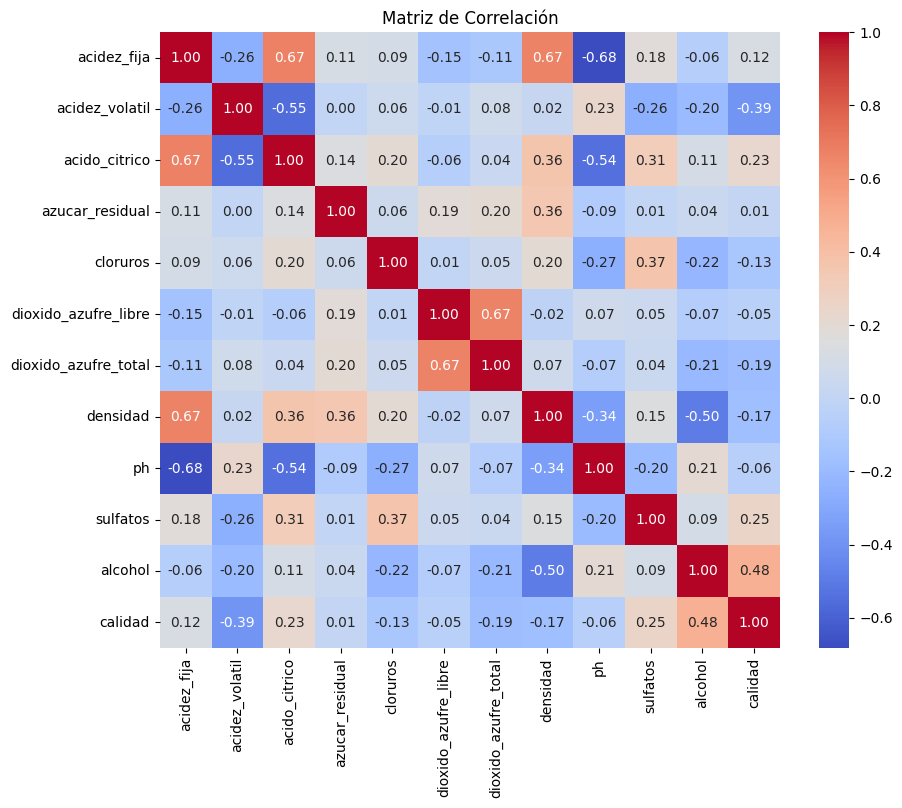

In [ ]:
## Exploracion
#Matriz de correlacion versión visual con seaborn

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Matriz de Correlación')
plt.show()

In [20]:
## Exploracion
# Matriz de corrlacion con altair

correlation_matrix = df.corr().reset_index().melt(id_vars='index')
correlation_matrix.columns = ['Variable1', 'Variable2', 'Correlación']

# Crear la matriz de correlación interactiva con Altair
heatmap = alt.Chart(correlation_matrix).mark_rect().encode(
    x=alt.X('Variable2:O', title='', sort=None),
    y=alt.Y('Variable1:O', title='', sort=None),
    color=alt.Color('Correlación:Q', scale=alt.Scale(scheme='spectral')),
    tooltip=['Variable1', 'Variable2', 'Correlación']
).properties(
    width=400,
    height=400,
    title='Matriz de Correlación Interactiva'
)

heatmap.show()


alt.Chart(...)

In [23]:
## Exploracion - ESTO PARA MI DATASET NO FUNCIONA

# Configura el número máximo de filas para el gráfico para que Altair pueda manejar grandes conjuntos de datos
alt.data_transformers.disable_max_rows()

# Convierte el DataFrame de vinos en un formato adecuado para Altair, donde cada fila representa una combinación de calidad, característica y valor
df_altair = pd.melt(df, id_vars=['calidad'], var_name='caracteristica', value_name='valor')


# Crea un gráfico de boxplot con Altair
boxplot = alt.Chart(df_altair).mark_boxplot().encode(
    x=alt.X('quality:O', title='Calidad del vino'),  # Codifica la variable 'quality' en el eje X con el tipo ordinal
    y=alt.Y('valor:Q', title='Valor de la característica'),  # Codifica la variable 'valor' en el eje Y con el tipo cuantitativo
    color=alt.Color('quality:N', title='Calidad del vino')  # Codifica la variable 'quality' para la coloración
).properties(
    title="Caracteristica vs calidad"  # Propiedades adicionales del gráfico
)

# Faceta el gráfico por cada característica del vino, creando múltiples gráficos facetados, uno para cada característica
boxplot_faceted = boxplot.facet(
    column='caracteristica:N',  # Faceta los gráficos por la variable 'caracteristica' con el tipo nominal
    spacing=5  # Espacio entre las facetas
).resolve_scale(
    y='independent'  # Asegura que cada gráfico facetado tenga su propia escala en el eje Y
)

# Muestra el gráfico facetado
boxplot_faceted

alt.FacetChart(...)

In [24]:
# Elegir la característica que se va a analizar (por ejemplo, 'alcohol')
caracteristica = 'alcohol'

# Agrupar por calidad y calcular el promedio de la característica seleccionada
df_agrupado = df.groupby('calidad')[caracteristica].mean().reset_index()

# Crear el gráfico de barras
grafico = alt.Chart(df_agrupado).mark_bar().encode(
    x=alt.X('calidad:O', title='Calidad', sort='ascending'),
    y=alt.Y(f'{caracteristica}:Q', title=f'Promedio de {caracteristica}'),
    tooltip=['calidad:O', f'{caracteristica}:Q']
).properties(
    title=f'Promedio de {caracteristica} por Nivel de Calidad',
    width=600,
    height=400
)

# Mostrar el gráfico
grafico.show()


alt.Chart(...)

In [26]:

# Configura Altair para manejar grandes conjuntos de datos
alt.data_transformers.disable_max_rows()

# Convierte el DataFrame a un formato adecuado para Altair
df_altair = pd.melt(df, id_vars=['calidad'], var_name='caracteristica', value_name='valor')

# Crea el gráfico de barras agrupado
barplot = alt.Chart(df_altair).mark_bar().encode(
    x=alt.X('calidad:O', title='Calidad del vino', axis=alt.Axis(labelAngle=0)),
    y=alt.Y('mean(valor):Q', title='Promedio de la característica'),
    color=alt.Color('caracteristica:N', title='Característica'),
    column=alt.Column('caracteristica:N', title='Características', spacing=5)
).properties(
    title="Promedio de las características por calidad del vino",
    width=100,  # Ancho de cada gráfico de barra
    height=300  # Alto de cada gráfico de barra
)

# Muestra el gráfico
barplot.show()


alt.Chart(...)

Hipotesis 1 - Si, existe una relacion entre las propiedades f-q del vino y su calidad

Hipotesis 2 - ¿Qué característica tiene mayor impacto en la calidad del vino?

In [ ]:
# Parte 1 - Calcula las correlaciones
correlaciones = df.corr()
correlaciones_rounded = correlaciones.round(2)  # redondeo
print(correlaciones_rounded)




# # Excluimos la correlación con 'Clase' porque sería siempre 1
# componentes_principales = correlaciones['calidad'].sort_values(ascending=False)[1:]

# # Obtén las mejores correlaciones
# mejores_correlaciones = correlaciones_rounded.loc[componentes_principales.index, 'calidad']

# print("\nMejores correlaciones con la calidad del vino:")
# print(mejores_correlaciones)

# print("\nRespuesta:")
# print("Las características más importantes para la calidad del vino son la Alcalinidad_de_Ceniza, No_Flavonoides_Fenólicos y el Ácido_Málico.")

                      acidez_fija  acidez_volatil  acido_citrico  \
acidez_fija                  1.00           -0.26           0.67   
acidez_volatil              -0.26            1.00          -0.55   
acido_citrico                0.67           -0.55           1.00   
azucar_residual              0.11            0.00           0.14   
cloruros                     0.09            0.06           0.20   
dioxido_azufre_libre        -0.15           -0.01          -0.06   
dioxido_azufre_total        -0.11            0.08           0.04   
densidad                     0.67            0.02           0.36   
ph                          -0.68            0.23          -0.54   
sulfatos                     0.18           -0.26           0.31   
alcohol                     -0.06           -0.20           0.11   
calidad                      0.12           -0.39           0.23   

                      azucar_residual  cloruros  dioxido_azufre_libre  \
acidez_fija                      0.11     

In [34]:
# Parte 2 - Correlaciones vs Calidad

# Se define que las correlaciones a evaluar deben ser con respecto a la variable (columna) "calidad"
    # se organizan de mayor a menor
    # el [1:] excluye la correlacion máxima, es decir, 1:1, que resulta de correlacionar calidad con calidad. como no tiene sentido, se elimina
    # de aca puedo ver en orden ascendente como correlacionan las cadacteristicas f/q con la calidad
componentes_principales = correlaciones['calidad'].sort_values(ascending=False)[1:]

# Obtén las mejores correlaciones
mejores_correlaciones = correlaciones_rounded.loc[componentes_principales.index, 'calidad']
print(mejores_correlaciones)

alcohol                 0.48
sulfatos                0.25
acido_citrico           0.23
acidez_fija             0.12
azucar_residual         0.01
dioxido_azufre_libre   -0.05
ph                     -0.06
cloruros               -0.13
densidad               -0.17
dioxido_azufre_total   -0.19
acidez_volatil         -0.39
Name: calidad, dtype: float64


Hipotesis 2 - Las propiedades f/q que más influyen en la calidad del vino son el contenido de alcohol y la acidéz volátil

Hipotesis 3 - ¿Qué característica tiene mayor impacto en la calidad del vino?